In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

#file - box_office_revenue

#reading excel file 
df = pd.read_csv("box_office_revenue.csv")

#filling NaN values
#1st approach with the same value as the previous year
df.fillna(method='ffill', inplace=True)

print(df)

#defining dependent and independent variables
independent_variables = df.loc[:, df.columns != 'Box-office revenue']
independent_variables = independent_variables.loc[:, independent_variables.columns != 'Year']
#print(independent_variables)

    Year  Box-office revenue  Sessions/Performances  Number of facilities  \
0   1999              8815.0                   4570                 199.0   
1   2000             15408.0                   9016                 224.0   
2   2001             17888.0                  13196                 231.0   
3   2002             22572.0                  14938                 253.0   
4   2003             28780.0                  15143                 312.0   
5   2004             28974.0                  23371                 344.0   
6   2005             52476.0                  24471                 372.0   
7   2006             69854.0                  24717                 397.0   
8   2007             66415.0                  27650                 435.0   
9   2008             72100.0                  30581                 468.0   
10  2009             62787.0                  28809                 470.0   
11  2010             85239.0                  30088                 367.0   

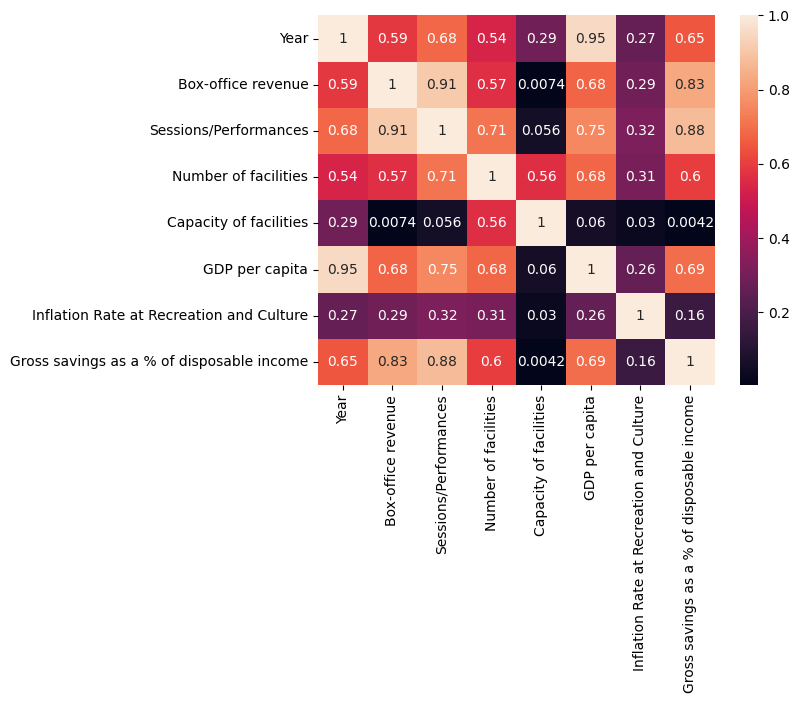

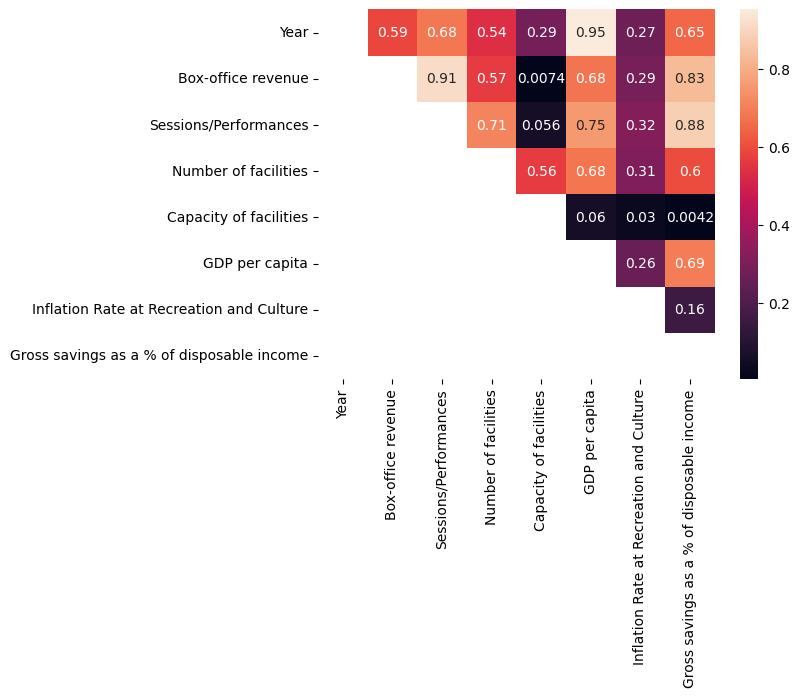

In [2]:
#Correlation Matrix

#create correlation matrix
corr_matrix = df.corr().abs()
sb.heatmap(corr_matrix, annot=True)
plt.show()

#select upper triangle of correlation matrix
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
sb.heatmap(corr_matrix_upper, annot=True)
plt.show()

In [3]:
#Model creation
#OLS

independent_variables = sm.add_constant(independent_variables)
ols_model = sm.OLS(df["Box-office revenue"], independent_variables).fit()

summary = ols_model.summary()
print(summary)

#R-squared - statistical measure of how well the regression line approximates the real data points.

#Adj. R-squared - actually adjusts the statistics based on the number of independent variables present.

#F-statistic - the ratio of mean squared error of the model to the mean squared error of residuals.

#AIC - estimates the relative quality of statistical models for a given dataset.

#BIC - used as a criterion for model selection among a finite set of models.

#coef - the coefficients of the independent variables and the constant term in the equation.

#std err - the basic standard error of the estimate of the coefficient.

#t - a measure of how statistically significant the coefficient is.

#P > |t| - the null-hypothesis that the coefficient = 0 is true.

                            OLS Regression Results                            
Dep. Variable:     Box-office revenue   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     16.21
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           5.47e-06
Time:                        19:53:06   Log-Likelihood:                -247.21
No. Observations:                  23   AIC:                             508.4
Df Residuals:                      16   BIC:                             516.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [4]:
#Model quantification

#BOR = 461.0575 + SP * 3.3628 + NF * (-154.0963) + TCF * 0.0742 + GDP * 1.3695 + IRRC * (-672.8067) + GSDI * (-1548.0268)

In [5]:
#Model statistical significance

#When we were analysing the statistical significance of the model, we decided to consider the coefficient of determination (R^2) as the most important parameter.
#Therefore, the coeficient of determination is the proportion of the variation in the dependent variable that is predictable from the independent variables.

#H0: the model is statistically insignificant
#H1: the model is statistically significant

#By looking at the statistics of our first model we can notice that R^2 = 0.859, the adjusted R^2 = 0.806 and the p-value of the F-statistic = 5.47e-06. Considering that our acceptance value
#(α) is 0.05, we can reject the null hypothesis (p-value < α).
#So, we can coclude that the model is statistically significant.

In [6]:
#Parameters statistical significance


In [7]:
#Model verification

##Multicolinearity

#If the value of VIF is –

    #1 => not correlated. Multicollinearity doesn’t exist.
    #Between 1 and 5 => moderately correlated. Low multicollinearity exists.
    #Greater than 5 => Highly correlated. High Multicollinearity exists.
    
vif_data = pd.DataFrame()
vif_data["feature"] = independent_variables.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i)
                          for i in range(len(independent_variables.columns))]
  
print(vif_data)

#By analysing the VIF test results we can observe that there is evidence of multicolinearity in several variables.

#How to remove multicolinearity?

                                     feature         VIF
0                                      const  348.571773
1                      Sessions/Performances    6.910078
2                       Number of facilities    8.050559
3                     Capacity of facilities    3.665859
4                             GDP per capita    4.126318
5   Inflation Rate at Recreation and Culture    1.250588
6  Gross savings as a % of disposable income    4.830579


In [8]:
#Autocorrelation

### Durbin-Watson

#In Durbin-Watson test the null hypothesis says that the model has no autocorrelation. Durbin-Watson = 1.530
#dL=0.8 dU = 2.061
#our p-value is less than alpha so we can reject the null hypothesis and we assume that this model has autocorrelation. 

### Prais-Winsten

#How to correct autocorrelation?

In [9]:
#Heteroskedasticity
#It tests whether the variance of the errors from a regression 
#is dependent on the values of the independent variables. 
#It is a χ2 test. You can perform the test using the fitted values 
#of the model, the predictors in the model and a subset of the 
#independent variables.

#The null hypothesis states that the model is homoscedascity (all its random variables have the same finite variance)

white_test = het_white(ols_model.resid,  ols_model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

#We accept the null hypothesis beacuse the p-value of the test statistics is higher than the alpha (0.05), this way we conclude that the model is homoscedacity and it doesn't have heteroskedacity.



{'Test Statistic': 22.999999999999847, 'Test Statistic p-value': 0.4017296104299232, 'F-Statistic': nan, 'F-Test p-value': nan}


In [10]:
#How to make the normality of residuals?

In [11]:
#Model creation 2 
#OLS - removed number of facilities because of high multicolinearity

independent_variables = df.loc[:, df.columns != 'Box-office revenue']
independent_variables = independent_variables.loc[:, independent_variables.columns != 'Year']
independent_variables = independent_variables.loc[:, independent_variables.columns != 'Number of facilities']

independent_variables = sm.add_constant(independent_variables)
ols_model = sm.OLS(df["Box-office revenue"], independent_variables).fit()

summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:     Box-office revenue   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     18.28
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        19:53:06   Log-Likelihood:                -248.40
No. Observations:                  23   AIC:                             508.8
Df Residuals:                      17   BIC:                             515.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [12]:
#Model creation 2 
#OLS - removed number of facilities and gross savings because of high multicolinearity

independent_variables = df.loc[:, df.columns != 'Box-office revenue']
independent_variables = independent_variables.loc[:, independent_variables.columns != 'Number of facilities']
independent_variables = independent_variables.loc[:, independent_variables.columns != 'Year']
independent_variables = independent_variables.loc[:, independent_variables.columns != 'Gross savings as a % of disposable income']

independent_variables = sm.add_constant(independent_variables)
ols_model = sm.OLS(df["Box-office revenue"], independent_variables).fit()

summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:     Box-office revenue   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     23.61
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           5.92e-07
Time:                        19:53:06   Log-Likelihood:                -248.64
No. Observations:                  23   AIC:                             507.3
Df Residuals:                      18   BIC:                             513.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [13]:
box_office_pred = ols_model.predict(independent_variables)
print(box_office_pred)

0     -6350.134344
1      6870.450742
2     21020.745806
3     25692.952187
4     23907.659435
5     51436.778235
6     54515.129188
7     53951.403068
8     63243.045281
9     72669.329255
10    67377.582926
11    75947.171261
12    62300.563969
13    68343.505886
14    74346.322185
15    75104.973432
16    70574.483969
17    82677.031699
18    85372.935098
19    95683.262418
20    96469.606031
21    23046.798429
22    53621.403845
dtype: float64


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


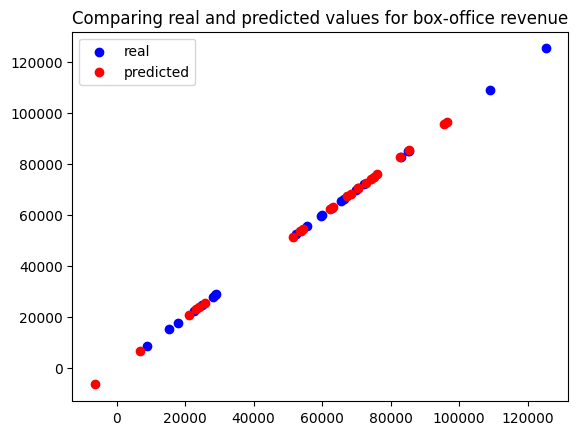

In [14]:
real = df.loc[:, df.columns == 'Box-office revenue']
box_office_pred.to_frame().reset_index()
print(type(real))
print(type(box_office_pred))

import matplotlib.pyplot as plt
plt.scatter(real, real, c ="blue")
plt.scatter(box_office_pred, box_office_pred, c ="red")
plt.title("Comparing real and predicted values for box-office revenue")
plt.legend(["real", "predicted"])
plt.show()